<a href="https://colab.research.google.com/github/tswiger34/AlzheimersPrediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[General Environment Prep](#scrollTo=DS_10j6A7mYX)

>[Exploratory Data Analysis](#scrollTo=UN5Xiz_b7raN)

>>[Load Data and EDA Dependencies](#scrollTo=_V-G3uEe7ytg)

>>[Explore Biomarker Data](#scrollTo=C2R6lPxC9Cx4)

>>>[Initial cleaning and EDA](#scrollTo=07pUBFsdWIt1)

>>>[Plots, Tables, and Further Cleaning](#scrollTo=xfEBRawVWSO_)

>>>>[Metadata](#scrollTo=HEctjbBiWo-7)

>>>>[LOCLAB](#scrollTo=0WF7XZtPcm39)

>>>>[UPenn](#scrollTo=ULpOiEeZg8Lb)

>>[Explore Diagnostics Data](#scrollTo=2Y-aWyvKkV54)

>>>[Initial Cleaning and EDA](#scrollTo=GC-z33vSk60B)

>>>[Plots, Tables, and Further Cleaning](#scrollTo=8NVSedqQESlj)

>>[Explore Image Data](#scrollTo=gXttKo_yBi0S)

>>[Explore Joined Data](#scrollTo=G5eNSRPxkffk)

>[Original Train/Test Split Do Not Run for Reproducibility](#scrollTo=uYPj0ziNAEgn)

>>[Load Data Prep Libraries](#scrollTo=gK_Nx1xOAroA)

>>[Perform 80/20 Split on Full Data](#scrollTo=3ytXMHQTA7Ea)

>[Final Train/Test Split Exploration](#scrollTo=W5jDR3YhNr1F)



# General Environment Prep

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load General Libraries
import pandas as pd
import numpy as np
import random
# Libraries for EDA
import matplotlib.pyplot as plt
# Data Prep Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Exploratory Data Analysis

## Load Data and EDA Dependencies

In [ ]:
# Libraries for EDA
import matplotlib.pyplot as plt

In [ ]:
# Load Image Metadata
img_df = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/ImageMetadata.csv')
# Load Biomarker Data
biomd = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/BiomarkerMetadata.csv')
loclab = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/LOCLABBiomarkerResults.csv')
penn = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/UPennBiomarkerResults.csv')
# Load Cohort Data
diag_df = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/Diagnostics.csv')

<ipython-input-102-61477d9945d0>:4: DtypeWarning: Columns (11,12,14,15,17,18,21,22,24,25,27,29,34,43,45,55,56,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  biomd = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/BiomarkerMetadata.csv')


## Explore Biomarker Data

### Initial cleaning and EDA

1. Most of the metadata columns can be removed
2. Need to filter for ADNI1 phase only
3. LOCLAB columns for removal:
  - VISCODE2
  - VISDATE
  - SAMPLECOLL
  - LABLOOD
  - USERDATE
  - USERDATE2
  - DD_CRF_VERSION_LABEL
  - LANGUAGE_CODE
  - HAS_QC_ERROR
  - update_stamp
4. UPenn columns for removal:
  - EXAMDATE
  - BATCH
  - RUNDATE
  - COMMENT
  - update_stamp

In [ ]:
## Metadata cleaning
biomd = biomd[biomd['PHASE'] == 'ADNI1']
cols_to_keep_biomd = ['PHASE', 'PTID', 'RID', 'VISCODE', 'RECNO', 'BIBLOOD', 'BIURINE', 'BICSF']
biomd = biomd[cols_to_keep_biomd]

## LOCLAB cleaning
loclab = loclab[loclab['PHASE'] == 'ADNI1']
cols_to_keep_loclab = ['PHASE', 'PTID', 'RID', 'VISCODE', 'CTWHITE', 'CTRED', 'PROTEIN', 'GLUCOSE', 'ID']
loclab = loclab[cols_to_keep_loclab]

## UPenn cleaning
penn = penn[penn['PHASE'] == 'ADNI1']
cols_to_keep_penn = ['PHASE', 'PTID', 'VISCODE2', 'ABETA40', 'ABETA42', 'TAU', 'PTAU']
penn = penn[cols_to_keep_penn]


In [ ]:
print('Biomarker Metadata Data Sample: \n')
print(biomd.head())

print('\nBiomarker Metadata Data Shape:')
print(biomd.shape)

print('\nBiomarker Metadata Summary:')
print(biomd.describe())

print('\nBiomarker Metadata Info:')
print(biomd.info())

Biomarker Metadata Data Sample: 

   PHASE        PTID  RID VISCODE  RECNO  BIBLOOD  BIURINE  BICSF
0  ADNI1  011_S_0002    2      bl    1.0      1.0      1.0   -4.0
1  ADNI1  011_S_0005    5      bl    1.0      1.0      1.0    1.0
2  ADNI1  011_S_0003    3      bl    1.0      1.0      1.0    1.0
3  ADNI1  011_S_0008    8      bl    1.0      1.0      1.0    1.0
4  ADNI1  022_S_0007    7      bl    1.0      1.0      1.0   -4.0

Biomarker Metadata Data Shape:
(4226, 8)

Biomarker Metadata Summary:
               RID        RECNO      BIBLOOD      BIURINE        BICSF
count  4226.000000  4226.000000  4226.000000  4226.000000  4226.000000
mean    687.921912     1.084714     0.518457     0.361098    -2.897302
std     414.887102     0.281026     1.475244     1.669423     2.073298
min       2.000000     1.000000    -4.000000    -4.000000    -4.000000
25%     315.000000     1.000000     1.000000     1.000000    -4.000000
50%     680.000000     1.000000     1.000000     1.000000    -4.000000
75

In [ ]:
print('LOCLAB Results Data Sample: \n')
print(loclab.head())

print('\nLOCLAB Results Data Shape:')
print(loclab.shape)

print('\nLOCLAB Results Summary:')
print(loclab.describe())

print('\nLOCLAB Results Info:')
print(loclab.info())

LOCLAB Results Data Sample: 

   PHASE        PTID  RID VISCODE  CTWHITE  CTRED  PROTEIN  GLUCOSE  ID
0  ADNI1  023_S_0031   31      bl      1.0  160.0     37.0     63.0   2
1  ADNI1  023_S_0042   42      bl      2.0    0.0     55.0    100.0   4
2  ADNI1  007_S_0041   41      bl      2.0    0.0     39.0     57.0   6
3  ADNI1  011_S_0023   23      bl      2.0  110.0     30.0     54.0   8
4  ADNI1  011_S_0010   10      bl      0.0   66.0     35.0     52.0  10

LOCLAB Results Data Shape:
(921, 9)

LOCLAB Results Summary:
               RID     CTWHITE        CTRED     PROTEIN     GLUCOSE  \
count   921.000000  921.000000   921.000000  921.000000  921.000000   
mean    648.710098    1.767644   149.369164   43.627579   56.521173   
std     405.678398    6.699633   610.015064   21.733846   16.280818   
min       3.000000   -1.000000    -1.000000   -1.000000   -1.000000   
25%     300.000000    0.000000     0.000000   32.000000   54.000000   
50%     610.000000    1.000000     2.000000   41.0

In [ ]:
print('UPenn Results Data Sample: \n')
print(penn.head())

print('\nUPenn Results Data Shape:')
print(penn.shape)

print('\nUPenn Results Summary:')
print(penn.describe())

print('\nUPenn Results Info:')
print(penn.info())

UPenn Results Data Sample: 

   PHASE        PTID VISCODE2  ABETA40  ABETA42    TAU   PTAU
0  ADNI1  011_S_0003       bl      NaN    741.5  239.7  22.83
1  ADNI1  011_S_0003      m12      NaN    601.4  251.7  24.18
2  ADNI1  022_S_0004       bl      NaN   1501.0  153.1  13.29
3  ADNI1  022_S_0004      m12      NaN   1176.0  159.7  13.30
4  ADNI1  011_S_0005       bl      NaN    547.3  337.0  33.43

UPenn Results Data Shape:
(938, 7)

UPenn Results Summary:
            ABETA40      ABETA42         TAU        PTAU
count     33.000000   936.000000  928.000000  928.000000
mean   16796.666667   869.003419  305.536961   29.751756
std     5758.171730   529.538461  125.080437   14.251992
min    10340.000000   210.900000  100.900000    9.090000
25%    12870.000000   499.925000  215.200000   19.437500
50%    16080.000000   673.550000  281.450000   26.605000
75%    18580.000000  1117.250000  372.975000   36.990000
max    31030.000000  3592.000000  890.000000  103.000000

UPenn Results Info:
<clas

Notes:
1. The Metadata and LOCLAB files looks like there are no Nulls
2. The majority of observations in the UPenn file do not have an ABETA40 measurement, should be dropped
3. Some missing values in the TAU and PTAU measurements in the UPenn file
4. All of the protein measurements seem to vary widely, should look at scatter plots for them to check for outliers and do some research to see what the normal range is.
5. Looks like they used -1 to indicate no sample was collected in the blood and urine biomarker results, need to filter these out
6. There seems to be some pretty large ourliers in the blood and urine biomarkers
7. They used -4 to indicate sample was not collected for CSF, Blood, and Urine samples in metadata file



### Plots, Tables, and Further Cleaning

#### Metadata

In [ ]:
# Tables
## Number of unique patients
print('Number of Unique Patients in Metadata:')
print(biomd['PTID'].nunique())

## Count number of observations where each sample type was collected
print('\nNumber of Observations per Sample Type:')
print(biomd['BIBLOOD'].value_counts())
print(biomd['BIURINE'].value_counts())
print(biomd['BICSF'].value_counts())

## Count number of blood samples by visit type
print('\nNumber of Blood Samples per Visit Type:')
biomd_blood = biomd[biomd['BIBLOOD'] == 1]
biomd_visits = biomd_blood.groupby(['PTID', 'VISCODE']).size().reset_index(name='count')
print(biomd_visits['VISCODE'].value_counts())

## Count number of urine samples by visit type
print('\nNumber of Urine Samples per Visit Type:')
biomd_urine = biomd[biomd['BIURINE'] == 1]
biomd_visits = biomd_urine.groupby(['PTID', 'VISCODE']).size().reset_index(name='count')
print(biomd_visits['VISCODE'].value_counts())

## Count number of CSF samples by visit type
print('\nNumber of CSF Samples per Visit Type:')
biomd_csf = biomd[biomd['BICSF'] == 1]
biomd_visits = biomd_csf.groupby(['PTID', 'VISCODE']).size().reset_index(name='count')
print(biomd_visits['VISCODE'].value_counts())

## Explore duplicates (where recno = 2)

Number of Unique Patients in Metadata:
819

Number of Observations per Sample Type:
BIBLOOD
 1.0    3819
-4.0     407
Name: count, dtype: int64
BIURINE
 1.0    3686
-4.0     540
Name: count, dtype: int64
BICSF
-4.0    3294
 1.0     932
Name: count, dtype: int64

Number of Blood Samples per Visit Type:
VISCODE
bl      813
m06     777
m12     723
m24     625
m36     438
m18     322
m48     107
uns1      1
Name: count, dtype: int64

Number of Urine Samples per Visit Type:
VISCODE
bl      808
m06     769
m12     711
m24     613
m36     405
m18     316
m48      50
uns1      1
Name: count, dtype: int64

Number of CSF Samples per Visit Type:
VISCODE
bl     411
m12    316
m24     98
m36     75
m48     32
Name: count, dtype: int64


Notes:
1. Pretty steep drop off in number of samples after month 24
2. Very few CSF samples collected relative to blood and urine, pretty much unusable after the 12 month follow up

#### LOCLAB

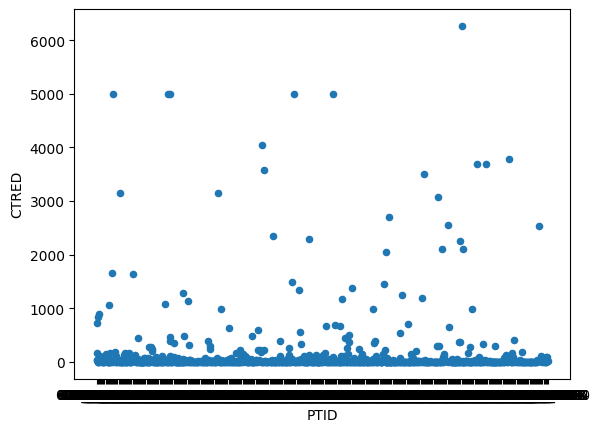

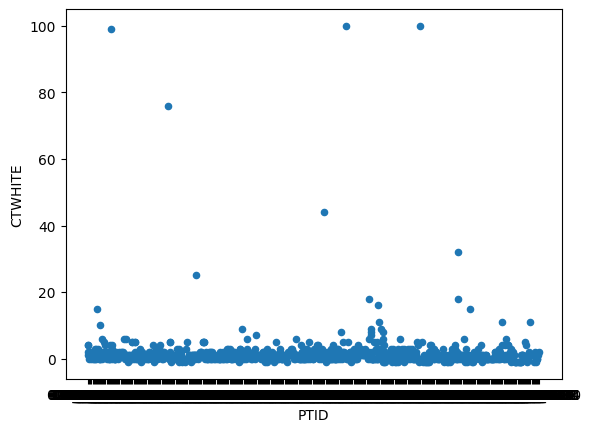

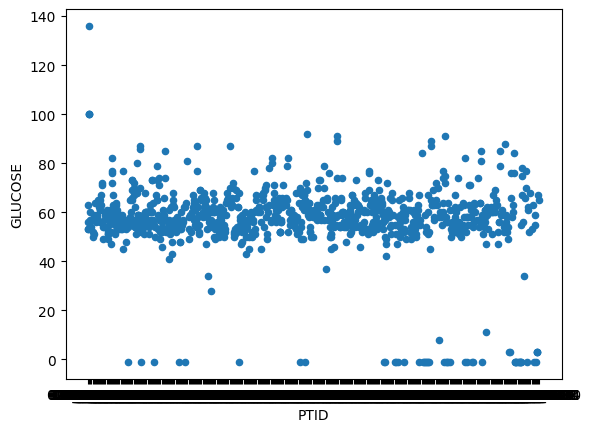

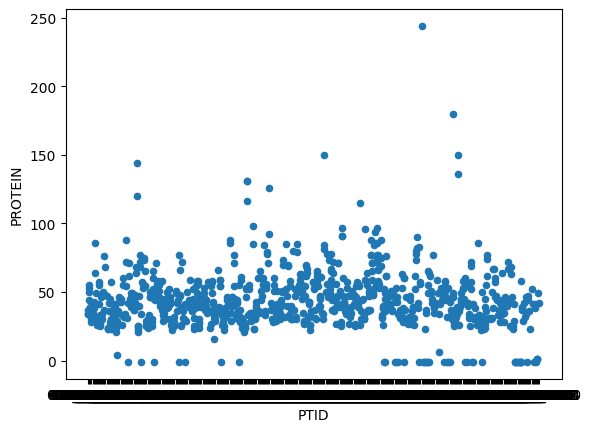

In [ ]:
# Plots
## Red Blood Cell Count Scatter Plot
loclab.plot(x='PTID', y='CTRED', kind='scatter')
plt.show()

## White Blood Cell Count Scatter Plot
loclab.plot(x='PTID', y='CTWHITE', kind='scatter')
plt.show()

## Glucose Scatter Plot
loclab.plot(x='PTID', y='GLUCOSE', kind='scatter')
plt.show()

## Protein Scatter Plot
loclab.plot(x='PTID', y='PROTEIN', kind='scatter')
plt.show()

#### UPenn

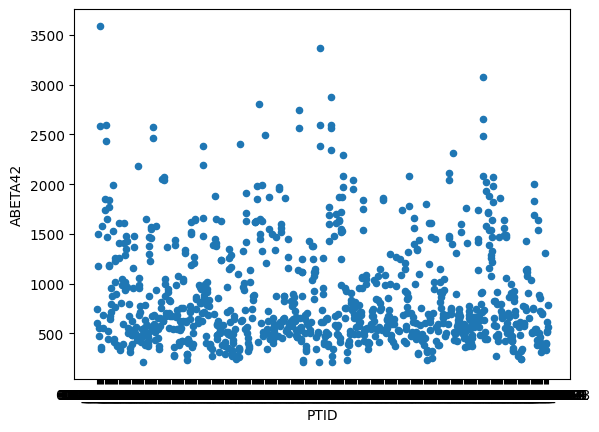

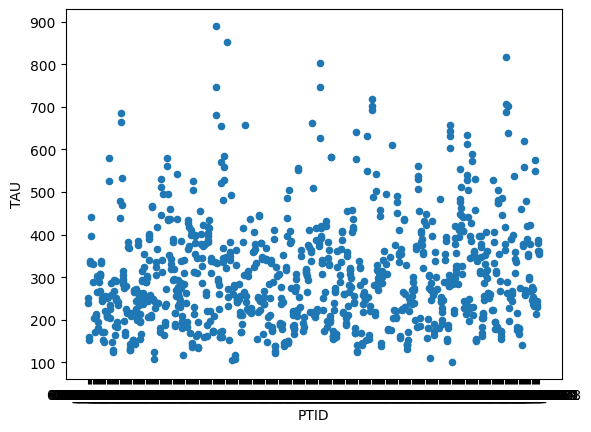

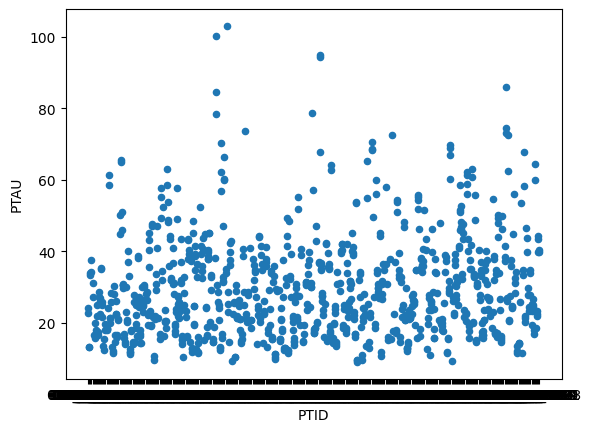

In [ ]:
# Plots
## ABETA42 Scatter Plot
penn.plot(x='PTID', y='ABETA42', kind='scatter')
plt.show()

## TAU Scatter Plot
penn.plot(x='PTID', y='TAU', kind='scatter')
plt.show()

## PTAU Scatter Plot
penn.plot(x='PTID', y='PTAU', kind='scatter')
plt.show()

## Explore Diagnostics Data

### Initial Cleaning and EDA

In [ ]:
# Data Cleaning
## Get ADNI1 Data
diag_df = diag_df[diag_df['PHASE'] == 'ADNI1']
## Drop columns with more than 2000 Nulls
diag_df = diag_df.dropna(thresh=diag_df.shape[0]-2000, axis=1)
## Keep only necessary columns
cols_to_keep_diag = ['PHASE', 'PTID', 'RID', 'VISCODE', 'DIAGNOSIS', 'DXNORM', 'DXMCI', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXOTHDEM', 'DXODES', 'DXCONFID']
diag_df = diag_df[cols_to_keep_diag]
## Data Informationm
print('Diagnostics Metadata Data Sample: \n')
print(diag_df.head())

print('\nDiagnostics Metadata Data Shape:')
print(diag_df.shape)

print('\nDiagnostics Metadata Summary:')
print(diag_df.describe())

print('\nDiagnostics Metadata Info:')
print(diag_df.info())

Diagnostics Metadata Data Sample: 

   PHASE        PTID  RID VISCODE  DIAGNOSIS  DXNORM  DXMCI  DXMPTR1  DXMPTR2  \
0  ADNI1  011_S_0002    2      bl        1.0     1.0   -4.0     -4.0     -4.0   
1  ADNI1  011_S_0003    3      bl        3.0    -4.0   -4.0     -4.0     -4.0   
2  ADNI1  011_S_0005    5      bl        1.0     1.0   -4.0     -4.0     -4.0   
3  ADNI1  011_S_0008    8      bl        1.0     1.0   -4.0     -4.0     -4.0   
4  ADNI1  022_S_0007    7      bl        3.0    -4.0   -4.0     -4.0     -4.0   

   DXMPTR3  DXMPTR4  DXMPTR5  DXMPTR6  DXMDUE  DXOTHDEM  DXODES  DXCONFID  
0     -4.0     -4.0     -4.0     -4.0    -4.0      -4.0    -4.0       4.0  
1     -4.0     -4.0     -4.0     -4.0    -4.0      -4.0    -4.0       3.0  
2     -4.0     -4.0     -4.0     -4.0    -4.0      -4.0    -4.0       4.0  
3     -4.0     -4.0     -4.0     -4.0    -4.0      -4.0    -4.0       3.0  
4     -4.0     -4.0     -4.0     -4.0    -4.0      -4.0    -4.0       4.0  

Diagnostics Metadata

### Plots, Tables, and Further Cleaning

Data Questions:
1. What are some potential subgroups?
  - Only Normal
  - Only MCI
  - Only AD
  - Normal_to_AD
  - MCI_to_AD
  - AD_to_Other
2. What happens when you break it down by physician confidence?


In [ ]:
# Data Cleaning
## Create subgroups
ptids_list = diag_df['PTID'].unique().tolist()
for ptid in ptids_list:
  patient = diag_df[diag_df['PTID'] == ptid].sort_values(by='VISCODE')
  initial_diagnosis = patient['DIAGNOSIS'].iloc[0]
  final_diagnosis = patient['DIAGNOSIS'].iloc[-1]
  if initial_diagnosis == 1 and final_diagnosis == 1:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'Only_Normal'
  elif initial_diagnosis == 2 and final_diagnosis == 2:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'Only_MCI'
  elif initial_diagnosis == 3 and final_diagnosis == 3:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'Only_AD'
  elif initial_diagnosis == 1 and final_diagnosis == 3:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'Normal_to_AD'
  elif initial_diagnosis == 2 and final_diagnosis == 3:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'MCI_to_AD'
  elif initial_diagnosis == 1 and final_diagnosis == 2:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'Normal_to_MCI'
  else:
    diag_df.loc[diag_df['PTID'] == ptid, 'DIAGNOSIS_GROUP'] = 'Other'

pt_groups = diag_df.drop_duplicates(subset=['PTID']).groupby('DIAGNOSIS_GROUP').size().reset_index(name='count')
print(pt_groups.value_counts())
total=0
for index, row in pt_groups.iterrows():
  total += row['count']
print(total)
print(len(ptids_list))

DIAGNOSIS_GROUP  count
MCI_to_AD        171      1
Normal_to_AD     3        1
Normal_to_MCI    15       1
Only_AD          192      1
Only_MCI         211      1
Only_Normal      211      1
Other            16       1
Name: count, dtype: int64
819
819


## Explore Image Data

File Folder Structure Example:

```
/ADNI
  └── /Subject_1
      └── /ScaleType
          ├── /BL
          │    └── /ImageID
          │        └── subjectId_ScaleType_ImageId.nii
          └── /Visit2
               └── /ImageID
                   └── subjectId_ScaleType_ImageId.nii
```



## Explore Joined Data

In [ ]:
full_df = pd.merge(diag_df, img_df, left_on=['PTID','VISCODE'], right_on=['Subject', 'Visit'], how='right')

In [ ]:
pt_groups = full_df.drop_duplicates(subset=['PTID']).groupby('DIAGNOSIS_GROUP').size().reset_index(name='count')
print(pt_groups.value_counts())

print('Total Patients Meeting Image Inclusion Requirements:')
print(sum(pt_groups['count']))

DIAGNOSIS_GROUP  count
MCI_to_AD        74       1
Normal_to_AD     2        1
Normal_to_MCI    9        1
Only_AD          98       1
Only_MCI         67       1
Only_Normal      124      1
Other            8        1
Name: count, dtype: int64
Total Patients Meeting Image Inclusion Requirements:
382


# Original Train/Test Split *Do Not Run for Reproducibility*

## Load Data Prep Libraries

In [ ]:
# Data Prep Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import random

In [ ]:
# Set random seed to 42
seed = 42
random.seed(seed)
np.random.seed(seed)

## Perform 80/20 Split on Full Data



In [ ]:
## Split full_df into train/test data
prep_df = full_df[['PTID', 'DIAGNOSIS_GROUP']]
prep_df = full_df.loc[full_df['DIAGNOSIS_GROUP']!='Other']
prep_df = prep_df.drop_duplicates(subset=['PTID'])
train_df, test_df = train_test_split(prep_df, test_size=0.2, random_state=seed)


In [ ]:
print(train_df.shape)
print(test_df.shape)

pt_groups = train_df.groupby('DIAGNOSIS_GROUP').size().reset_index(name='count')
print(pt_groups.value_counts())

pt_groups = test_df.groupby('DIAGNOSIS_GROUP').size().reset_index(name='count')
print(pt_groups.value_counts())

(300, 30)
(75, 30)
DIAGNOSIS_GROUP  count
MCI_to_AD        59       1
Normal_to_AD     2        1
Normal_to_MCI    8        1
Only_AD          76       1
Only_MCI         51       1
Only_Normal      104      1
Name: count, dtype: int64
DIAGNOSIS_GROUP  count
MCI_to_AD        15       1
Normal_to_MCI    1        1
Only_AD          22       1
Only_MCI         16       1
Only_Normal      20       1
Name: count, dtype: int64


In [ ]:
print(len(test_df))
print(len(train_df))
total_patients = len(full_df['PTID'].unique())
print(total_patients)

75
300
383


In [ ]:
print(train_df)
print(test_df)

      PHASE        PTID     RID VISCODE  DIAGNOSIS  DXNORM  DXMCI  DXMPTR1  \
1110  ADNI1  033_S_1283  1283.0     m12        3.0    -4.0   -4.0     -4.0   
440   ADNI1  116_S_0382   382.0     m06        1.0     1.0   -4.0     -4.0   
487   ADNI1  114_S_0374   374.0     m06        3.0    -4.0   -4.0     -4.0   
2109  ADNI1  002_S_1268  1268.0     m18        2.0    -4.0    1.0      1.0   
91    ADNI1  137_S_0301   301.0     m06        1.0     1.0   -4.0     -4.0   
...     ...         ...     ...     ...        ...     ...    ...      ...   
421   ADNI1  116_S_0649   649.0     m06        2.0    -4.0    1.0      1.0   
604   ADNI1  094_S_1267  1267.0     m36        1.0     1.0   -4.0     -4.0   
1575  ADNI1  023_S_0042    42.0     m12        3.0    -4.0   -4.0     -4.0   
2030  ADNI1  007_S_0041    41.0     m24        3.0    -4.0   -4.0     -4.0   
584   ADNI1  098_S_0172   172.0     m24        1.0     1.0   -4.0     -4.0   

      DXMPTR2  DXMPTR3  ...  Group  Sex  Age  Visit  Modality  

In [ ]:
test_patients = test_df['PTID'].unique().tolist()
biomarker_train = biomd[~biomd['PTID'].isin(test_patients)]
biomarker_test = biomd[biomd['PTID'].isin(test_patients)]
print(biomarker_train)

      PHASE        PTID   RID VISCODE  RECNO  BIBLOOD  BIURINE  BICSF
0     ADNI1  011_S_0002     2      bl    1.0      1.0      1.0   -4.0
1     ADNI1  011_S_0005     5      bl    1.0      1.0      1.0    1.0
2     ADNI1  011_S_0003     3      bl    1.0      1.0      1.0    1.0
3     ADNI1  011_S_0008     8      bl    1.0      1.0      1.0    1.0
4     ADNI1  022_S_0007     7      bl    1.0      1.0      1.0   -4.0
...     ...         ...   ...     ...    ...      ...      ...    ...
4221  ADNI1  082_S_0641   641     m18    1.0     -4.0     -4.0   -4.0
4222  ADNI1  082_S_0641   641     m24    1.0     -4.0     -4.0   -4.0
4223  ADNI1  082_S_0304   304     m24    1.0     -4.0     -4.0   -4.0
4224  ADNI1  082_S_0304   304     m36    1.0     -4.0     -4.0   -4.0
4225  ADNI1  082_S_1377  1377     m24    1.0      1.0      1.0   -4.0

[3791 rows x 8 columns]


In [ ]:
train_df.to_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/ImageTrainDataInfo.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/TestDataInfo.csv', index=False)
biomarker_train.to_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/BiomarkerTrainDataInfo.csv', index=False)


In [ ]:
total_patients = diag_df['PTID'].nunique()
print(total_patients)

819


In [ ]:
total_patients = img_df['Subject'].nunique()
print(total_patients)

382


In [ ]:
biomarker_train = pd.read_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/BiomarkerTrainDataInfo.csv')
loclab_train = pd.merge(biomarker_train, loclab, left_on=['PTID', 'VISCODE'], right_on=['PTID', 'VISCODE'], how='left')
print(loclab_train)

     PHASE_x        PTID  RID_x VISCODE  RECNO  BIBLOOD  BIURINE  BICSF  \
0      ADNI1  011_S_0002      2      bl    1.0      1.0      1.0   -4.0   
1      ADNI1  011_S_0005      5      bl    1.0      1.0      1.0    1.0   
2      ADNI1  011_S_0003      3      bl    1.0      1.0      1.0    1.0   
3      ADNI1  011_S_0008      8      bl    1.0      1.0      1.0    1.0   
4      ADNI1  022_S_0007      7      bl    1.0      1.0      1.0   -4.0   
...      ...         ...    ...     ...    ...      ...      ...    ...   
3786   ADNI1  082_S_0641    641     m18    1.0     -4.0     -4.0   -4.0   
3787   ADNI1  082_S_0641    641     m24    1.0     -4.0     -4.0   -4.0   
3788   ADNI1  082_S_0304    304     m24    1.0     -4.0     -4.0   -4.0   
3789   ADNI1  082_S_0304    304     m36    1.0     -4.0     -4.0   -4.0   
3790   ADNI1  082_S_1377   1377     m24    1.0      1.0      1.0   -4.0   

     PHASE_y  RID_y  CTWHITE  CTRED  PROTEIN  GLUCOSE    ID  
0        NaN    NaN      NaN    NaN  

In [ ]:
loclab_test = pd.merge(biomarker_test, loclab, left_on=['PTID', 'VISCODE'], right_on=['PTID', 'VISCODE'], how='inner')
print(loclab_test)
loclab_test.to_csv('/content/drive/MyDrive/PBHLT7120_Project/Data/FullData/CSVFiles/LOCLABTestData.csv', index=False)

    PHASE_x        PTID  RID_x VISCODE  RECNO  BIBLOOD  BIURINE  BICSF  \
0     ADNI1  022_S_0014     14      bl    1.0      1.0      1.0   -4.0   
1     ADNI1  022_S_0014     14      bl    2.0     -4.0     -4.0    1.0   
2     ADNI1  123_S_0091     91      bl    1.0      1.0      1.0    1.0   
3     ADNI1  023_S_0083     83      bl    1.0      1.0      1.0    1.0   
4     ADNI1  037_S_0150    150      bl    1.0      1.0      1.0    1.0   
..      ...         ...    ...     ...    ...      ...      ...    ...   
145   ADNI1  006_S_1130   1130     m36    2.0     -4.0     -4.0    1.0   
146   ADNI1  023_S_1262   1262     m36    1.0      1.0     -4.0    1.0   
147   ADNI1  023_S_0331    331     m48    1.0      1.0     -4.0    1.0   
148   ADNI1  027_S_0403    403     m48    1.0      1.0      1.0    1.0   
149   ADNI1  027_S_0835    835     m48    1.0      1.0      1.0    1.0   

    PHASE_y  RID_y  CTWHITE  CTRED  PROTEIN  GLUCOSE    ID  
0     ADNI1     14      1.0    0.0     53.0     51

# Final Train/Test Split Exploration

In [ ]:
# Data Prep Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import random
# Set random seed to 42
seed = 42
random.seed(seed)
np.random.seed(seed)
## Split Image Data
# img_df['Visit'].replace('sc', 'bl', inplace=True)
img_prep = pd.merge(img_df, diag_df, left_on=['Subject', 'Visit'], right_on=['PTID', 'VISCODE'], how='inner')
img_ptids = img_prep.drop_duplicates(subset=['Subject'])
img_train, img_test = train_test_split(img_ptids, test_size=0.2, random_state=seed)
print(img_train.shape)
print(img_test.shape)

pt_groups = img_train.groupby('DIAGNOSIS_GROUP').size().reset_index(name='count')
print(pt_groups.value_counts())
pt_groups = img_test.groupby('DIAGNOSIS_GROUP').size().reset_index(name='count')
print(pt_groups.value_counts())

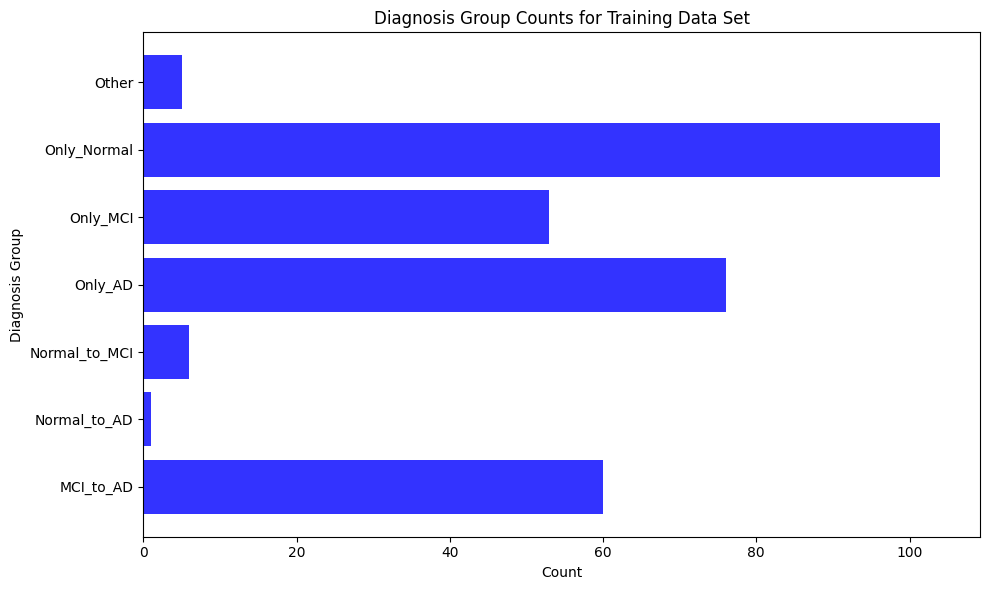

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the first dataset
data1 = {
    "DIAGNOSIS_GROUP": ["MCI_to_AD", "Normal_to_AD", "Normal_to_MCI",
                        "Only_AD", "Only_MCI", "Only_Normal", "Other"],
    "count": [60, 1, 6, 76, 53, 104, 5]
}

# Convert data to a DataFrame
df1 = pd.DataFrame(data1)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))

# Plot the dataset
plt.barh(df1["DIAGNOSIS_GROUP"], df1["count"], color='blue', alpha=0.8)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Diagnosis Group")
plt.title("Diagnosis Group Counts for Training Data Set")
plt.tight_layout()

# Show the chart
plt.show()


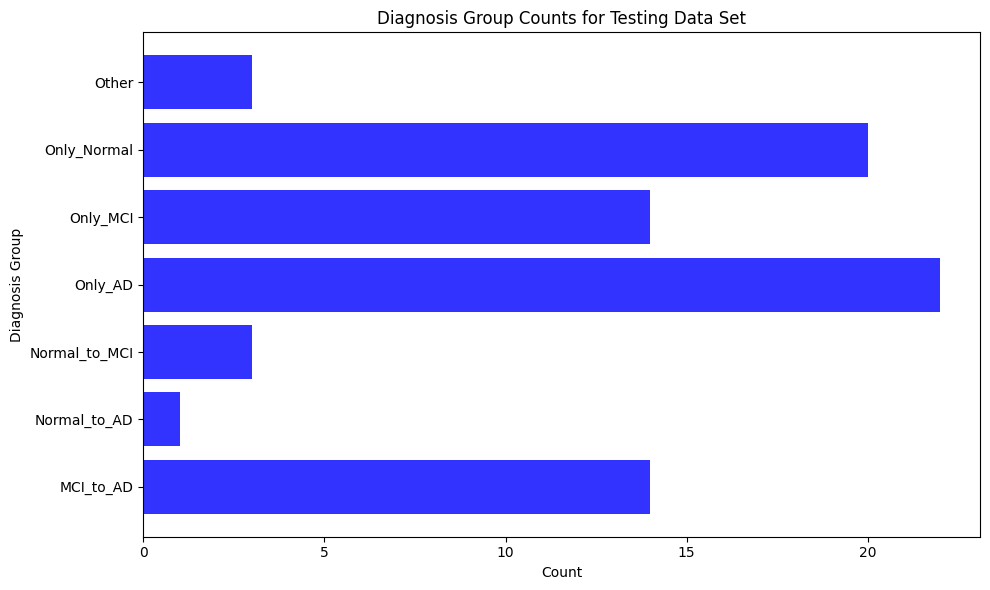

In [ ]:

# Data for the first dataset
data1 = {
    "DIAGNOSIS_GROUP": ["MCI_to_AD", "Normal_to_AD", "Normal_to_MCI",
                        "Only_AD", "Only_MCI", "Only_Normal", "Other"],
    "count": [14, 1, 3, 22, 14, 20, 3]
}

# Convert data to a DataFrame
df1 = pd.DataFrame(data1)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))

# Plot the dataset
plt.barh(df1["DIAGNOSIS_GROUP"], df1["count"], color='blue', alpha=0.8)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Diagnosis Group")
plt.title("Diagnosis Group Counts for Testing Data Set")
plt.tight_layout()

# Show the chart
plt.show()

In [7]:
import pandas as pd

df = pd.read_csv('metrics.csv')
df['Architecture'] = df['Model'].str.split('_').str[0]
df.drop_duplicates(subset=['Architecture', 'Epoch'], inplace=True)
df.reset_index(drop=True, inplace=True)
print(df)
new_resnet_df = df[df['Architecture'] == 'resnet18']
new_vgg_df = df[df['Architecture'] == 'vgg11']
new_densenet_df = df[df['Architecture'] == 'densenet121']
print(new_resnet_df)
print(new_vgg_df)
print(new_densenet_df)

          Model  Epoch  Train Accuracy  Train F1  Val Accuracy    Val F1  \
0      resnet18      1        0.506579  0.366755      0.545455  0.385027   
1      resnet18      2        0.506579  0.356258      0.545455  0.385027   
2      resnet18      3        0.539474  0.413651      0.545455  0.385027   
3      resnet18      4        0.539474  0.413651      0.536364  0.380850   
4      resnet18      5        0.506579  0.376634      0.554545  0.405130   
..          ...    ...             ...       ...           ...       ...   
85  densenet121     26        0.914474  0.914485      0.518182  0.519021   
86  densenet121     27        0.921053  0.921012      0.518182  0.519179   
87  densenet121     28        0.934211  0.934176      0.481818  0.482718   
88  densenet121     29        0.947368  0.947295      0.518182  0.519179   
89  densenet121     30        0.894737  0.894737      0.527273  0.528213   

   Architecture  
0      resnet18  
1      resnet18  
2      resnet18  
3      resnet18

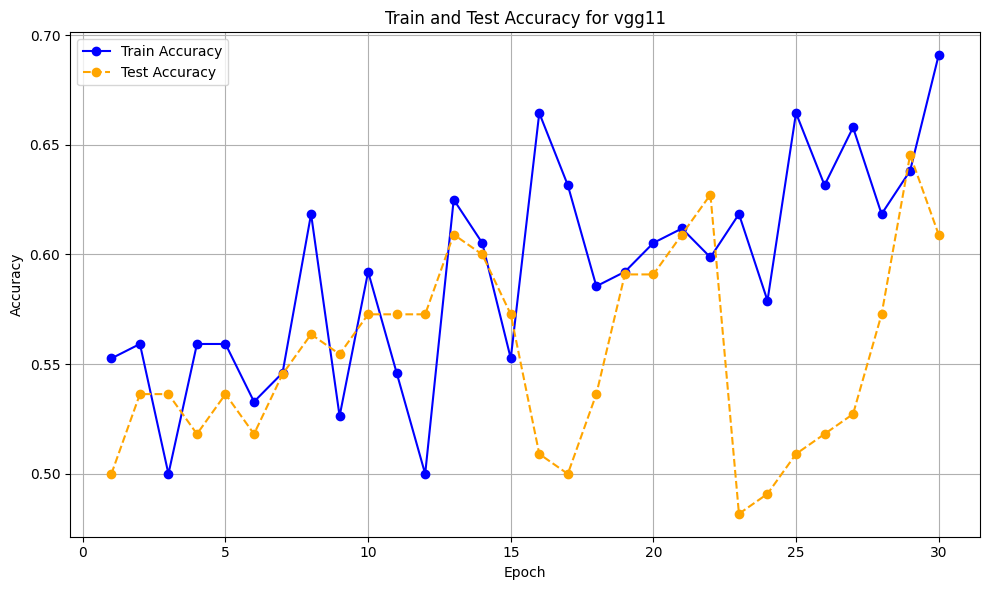

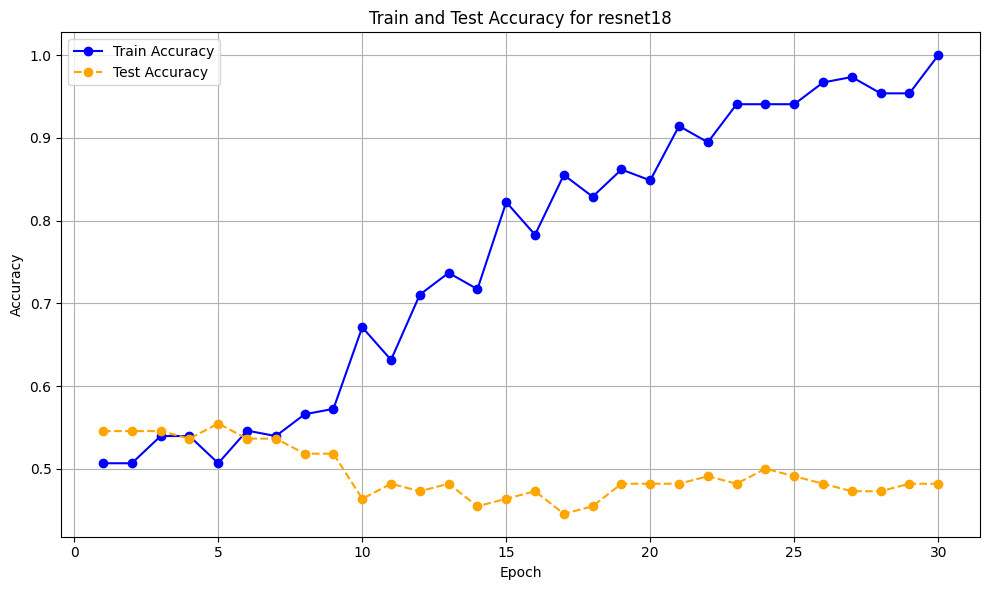

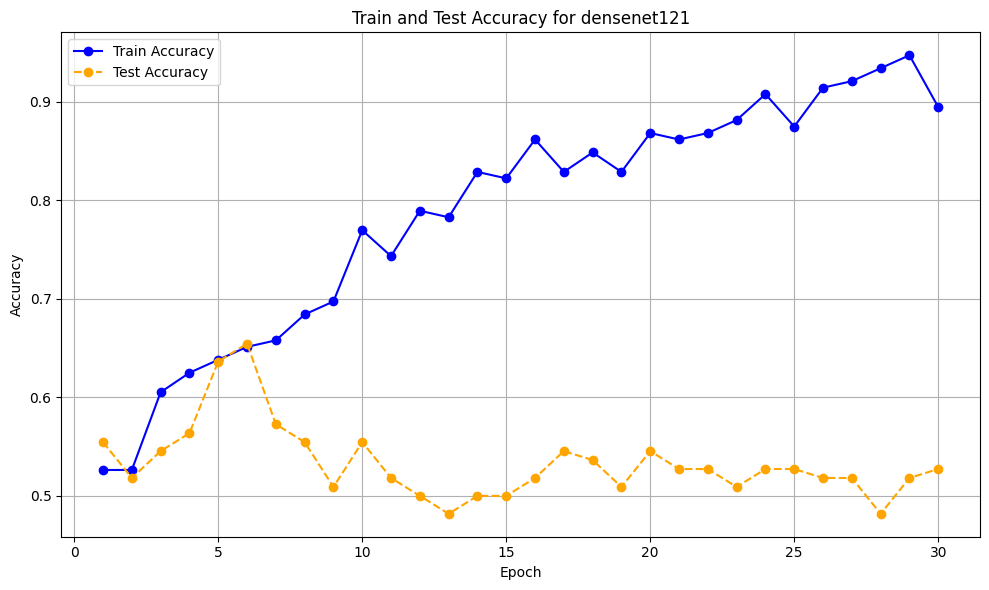

In [8]:
# Create the plot
df_list = [new_vgg_df, new_resnet_df, new_densenet_df]
for df in df_list:
    epochs = df['Epoch']
    train_accuracy = df['Train Accuracy']
    test_accuracy = df['Val Accuracy']
    architecture = df['Architecture'].values[0]
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o', linestyle='--', color='orange')

    # Add labels, title, and legend
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Train and Test Accuracy for {architecture}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()